In [2]:
# API KEY를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv


# API KEY 정보로드
load_dotenv()

True

In [1]:
# LangSmith 추적을 설정합니다. https://smith.langchain.com
# .env 파일에 LANGCHAIN_API_KEY를 입력합니다.
# !pip install -qU langchain-teddynote
## qU : quite update, 조용히 업데이트 하라는 의미.
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("CH01-Basic")
# logging.langsmith("LANGCHAIN_PROJECT")
## logging.langsmith("CH01-Basic", set_enable=False)    ## langsmith추적안하는 명령어

LangSmith 추적을 시작합니다.
[프로젝트명]
CH01-Basic


## ChatOpenAI

OpenAI 사의 채팅 전용 Large Language Model(llm) 입니다.

객체를 생성할 때 다음을 옵션 값을 지정할 수 있습니다. 옵션에 대한 상세 설명은 다음과 같습니다.

`temperature`

- 사용할 샘플링 온도는 0과 2 사이에서 선택합니다. 0.8과 같은 높은 값은 출력을 더 무작위하게 만들고, 0.2와 같은 낮은 값은 출력을 더 집중되고 결정론적으로 만듭니다.
- **`창의성`** 이라고 생각해라.
    - value의미?
        - 0 : 문서기반은 0으로 두고 사실기반 base로 만들도록.
        - 1 : 광고기획할때는 1에 가까이 줘서 창의성 발휘해야함.

`max_tokens`

- 채팅 완성에서 생성할 토큰의 최대 개수입니다.
- default = 4096이다. 

`model_name`: 적용 가능한 모델 리스트
- `gpt-4o`
- `gpt-4o-mini`
- `o1-preview`, `o1-preview-mini`: tier5 계정 이상만 사용 가능. $1,000 이상 충전해야 tier5 계정이 됩니다.

![gpt-models.png](./images/gpt-models2.png)

- 링크: https://platform.openai.com/docs/models


In [3]:
from langchain_openai import ChatOpenAI


# 객체 생성
llm = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    model_name="gpt-4o",  # 모델명
)

# 질의내용
question = "대한민국의 수도는 어디인가요?"

# 질의
## invoke라는 함수안에다가 우리가 질문하는걸 넣어줘야 한다.
print(f"[답변]: \n {llm.invoke(question)}")



[답변]: 
 content='대한민국의 수도는 서울입니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 16, 'total_tokens': 24, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_159d8341cc', 'finish_reason': 'stop', 'logprobs': None} id='run-e7da10f4-54b7-4fc3-ac09-af3511266993-0' usage_metadata={'input_tokens': 16, 'output_tokens': 8, 'total_tokens': 24, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}}


해당 함수의 파라미터나 예시문구 확인(doc string이라 한다)


### 답변의 형식(AI Message)

In [4]:
# 질의내용
question = "대한민국의 수도는 어디인가요?"

# 질의
response = llm.invoke(question)

In [10]:
response

#print(response)

## AIMessage라는 객체가 감싸줘서 return된다.
## 해당 객체는 content라는 key가 있고, 그안에 value가 들어있다.
## 또한 response_metadata의 부가 정보를 더 준다.

AIMessage(content='대한민국의 수도는 서울입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 16, 'total_tokens': 24, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_159d8341cc', 'finish_reason': 'stop', 'logprobs': None}, id='run-a3a358ab-87f6-4bc4-94bf-aeaf60f0c0dd-0', usage_metadata={'input_tokens': 16, 'output_tokens': 8, 'total_tokens': 24, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}})

In [11]:
response.content

'대한민국의 수도는 서울입니다.'

In [12]:
response.response_metadata

{'token_usage': {'completion_tokens': 8,
  'prompt_tokens': 16,
  'total_tokens': 24,
  'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}},
 'model_name': 'gpt-4o-2024-08-06',
 'system_fingerprint': 'fp_159d8341cc',
 'finish_reason': 'stop',
 'logprobs': None}

In [14]:
response.usage_metadata

{'input_tokens': 16,
 'output_tokens': 8,
 'total_tokens': 24,
 'input_token_details': {'cache_read': 0},
 'output_token_details': {'reasoning': 0}}

In [10]:
## response_metadata의 Token_usage만 가져오기
response.response_metadata["token_usage"]

{'completion_tokens': 31,
 'prompt_tokens': 16,
 'total_tokens': 47,
 'completion_tokens_details': {'reasoning_tokens': 0}}

In [23]:
response.response_metadata["token_usage"]['completion_tokens_details']#['reasoning_tokens']

{'audio_tokens': None, 'reasoning_tokens': 0}

### LogProb 활성화

주어진 텍스트에 대한 모델의 **토큰 확률의 로그 값** 을 의미합니다. 토큰이란 문장을 구성하는 개별 단어나 문자 등의 요소를 의미하고, 확률은 **모델이 그 토큰을 예측할 확률**을 나타냅니다.

- 각 토큰을 GPT가 예측해서 준다.예측할때 각 토큰별로 확률값이 어떻게 생겨먹었는지 확인하고 싶을때 LogProb을 활성화 시키면된다.

In [24]:
# 객체 생성
llm_with_logprob = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    max_tokens=2048,  # 최대 토큰수
    model_name="gpt-4o",  # 모델명
).bind(logprobs=True)



In [25]:
# 질의내용
question = "대한민국의 수도는 어디인가요?"

# 질의
response = llm_with_logprob.invoke(question)

In [26]:
response

AIMessage(content='대한민국의 수도는 서울입니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 16, 'total_tokens': 24, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_159d8341cc', 'finish_reason': 'stop', 'logprobs': {'content': [{'token': '대한', 'bytes': [235, 140, 128, 237, 149, 156], 'logprob': -6.704273e-07, 'top_logprobs': []}, {'token': '민국', 'bytes': [235, 175, 188, 234, 181, 173], 'logprob': -1.9361265e-07, 'top_logprobs': []}, {'token': '의', 'bytes': [236, 157, 152], 'logprob': -1.9361265e-07, 'top_logprobs': []}, {'token': ' 수도', 'bytes': [32, 236, 136, 152, 235, 143, 132], 'logprob': -6.704273e-07, 'top_logprobs': []}, {'token': '는', 'bytes': [235, 138, 148], 'logprob': 0.0, 'top_logprobs': []}, {'token': ' 서울', 'bytes': [32, 236, 132, 156, 236, 154, 184], 'logprob

![image](https://github.com/user-attachments/assets/36328bb4-919d-47f1-83ad-0e58a47b1d92)

- log_prob에서 사용되는 함수, (0 < a < 1)을 사용함.
- 즉, 0에 가까운 숫자일수록 높은확률(y값)이 나온다.

In [ ]:
# 결과 출력
response.response_metadata

## 각 토큰별로 bytes가 나오게 되고 그 확률값들이 logprob로 찍히게 된다.
## log_prob은 토큰 확률값에다가 자연로그를 씌워서 확률변환을 한것이다. 
#### 이것이 0에 가까운 숫자일수록 높은확률이다.확률낮을수록 음수 or 무한대로 간다.

## [{'token': '대한','bytes': [235, 140, 128, 237, 149, 156],'logprob': -6.704273e-07,
#### token의 텍스트가 UTF-8 형식으로 인코딩된 바이트 값. "대한"의 UTF-8 바이트 값이 [235, 140, 128, 237, 149, 156]임을 보여준다.
#### UTF-8 : 유니코드 인코딩방식. 문자들을 가변길이의 바이트(1~4byte)로 인코딩한다.
#### 영어는 'A'**는 UTF-8에서 `0x41`로 인코딩되어 1byte를 차지함.
#### 한글은 '가'**는 UTF-8에서 `0xEAB080`로 인코딩되어 3byte를 차지함.
###### `0xEAB080`은 16진수로 표현됨. 16진수값에서 2자리는 1byte=8bit를 표현.

{'token_usage': {'completion_tokens': 8,
  'prompt_tokens': 16,
  'total_tokens': 24,
  'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}},
 'model_name': 'gpt-4o-2024-08-06',
 'system_fingerprint': 'fp_159d8341cc',
 'finish_reason': 'stop',
 'logprobs': {'content': [{'token': '대한',
    'bytes': [235, 140, 128, 237, 149, 156],
    'logprob': -6.704273e-07,
    'top_logprobs': []},
   {'token': '민국',
    'bytes': [235, 175, 188, 234, 181, 173],
    'logprob': -1.9361265e-07,
    'top_logprobs': []},
   {'token': '의',
    'bytes': [236, 157, 152],
    'logprob': -1.9361265e-07,
    'top_logprobs': []},
   {'token': ' 수도',
    'bytes': [32, 236, 136, 152, 235, 143, 132],
    'logprob': -6.704273e-07,
    'top_logprobs': []},
   {'token': '는',
    'bytes': [235, 138, 148],
    'logprob': 0.0,
    'top_logprobs': []},
   {'token': ' 서울',
    'bytes': [32, 236, 132, 156, 236, 154, 184],
    'logpr

### 스트리밍 출력

스트리밍 옵션은 질의에 대한 답변을 실시간으로 받을 때 유용합니다.

In [28]:
# 스트림 방식으로 질의
# answer 에 스트리밍 답변의 결과를 받습니다.
answer = llm.stream("대한민국의 아름다운 관광지 10곳과 주소를 알려주세요!")

In [40]:
answer
## python의 generator객체를 나타냄.

<generator object BaseChatModel.stream at 0x000001F5BBCCB6E0>

In [41]:
for item in answer:
    print(item)

In [36]:
## 스트림방식? 토큰나온대로 계속 출력해주는것.
## 이건 재활용이 안된다. 그냥 한개의 토큰을 출력하고 끝난다.
# 저장하고 싶다면?
final_answer = ""
for token in answer:
    print(token.content, end="", flush=True)
    final_answer += token.content
final_answer
# 위에 답변이 모두 저장됨을 확인할수 있다.

''

In [ ]:
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
for token in answer:
    print(token.content, end="", flush=True)

In [16]:
from langchain_teddynote.messages import stream_response

# 스트림 방식으로 질의
# answer 에 스트리밍 답변의 결과를 받습니다.
answer = llm.stream("대한민국의 아름다운 관광지 10곳과 주소를 알려주세요!")
stream_response(answer)  ## only 출력만한다.
## 추가 기능
final_answer2 = stream_response(
    answer, return_output=True
)  ## return값을 받아서 저장할수 있게 해준다.

물론입니다! 대한민국에는 아름다운 관광지가 많이 있습니다. 다음은 그 중 10곳과 그 주소입니다:

1. **경복궁**
   - 주소: 서울특별시 종로구 사직로 161

2. **부산 해운대 해수욕장**
   - 주소: 부산광역시 해운대구 우동

3. **제주도 한라산 국립공원**
   - 주소: 제주특별자치도 제주시 1100로 2070-61

4. **경주 불국사**
   - 주소: 경상북도 경주시 불국로 385

5. **설악산 국립공원**
   - 주소: 강원도 속초시 설악산로 833

6. **남이섬**
   - 주소: 강원도 춘천시 남산면 남이섬길 1

7. **안동 하회마을**
   - 주소: 경상북도 안동시 풍천면 하회종가길 40

8. **전주 한옥마을**
   - 주소: 전라북도 전주시 완산구 기린대로 99

9. **서울 남산타워 (N서울타워)**
   - 주소: 서울특별시 용산구 남산공원길 105

10. **순천만 국가정원**
    - 주소: 전라남도 순천시 국가정원1호길 47

이 관광지들은 각각 독특한 매력을 가지고 있으며, 대한민국의 자연과 문화를 경험할 수 있는 좋은 장소들입니다. 즐거운 여행 되세요!

## 멀티모달 모델(이미지 인식)

멀티모달은 여러 가지 형태의 정보(모달)를 통합하여 처리하는 기술이나 접근 방식을 의미합니다. 이는 다음과 같은 다양한 데이터 유형을 포함할 수 있습니다.

- 텍스트: 문서, 책, 웹 페이지 등의 글자로 된 정보
- 이미지: 사진, 그래픽, 그림 등 시각적 정보
- 오디오: 음성, 음악, 소리 효과 등의 청각적 정보
- 비디오: 동영상 클립, 실시간 스트리밍 등 시각적 및 청각적 정보의 결합

`gpt-4o` 나 `gpt-4-turbo` 모델은 이미지 인식 기능(Vision) 이 추가되어 있는 모델입니다.

In [ ]:
## LLM이라는 객체를 생성해서 multimodal class를 정의해줬다.
## 정의한 Multimodal안에다가 LLM을 넣어서 래핑을 해주면 된다.
from langchain_teddynote.models import MultiModal

from langchain_teddynote.messages import stream_response


# 객체 생성

llm = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    model_name="gpt-4o",  # 모델명 / gpt-4turbo는 이미지 인식이 안들어가 있으므로 gpt-vision model을 써야한다.
)


# 멀티모달 객체 생성

multimodal_llm = MultiModal(llm)

NameError: name 'ChatOpenAI' is not defined


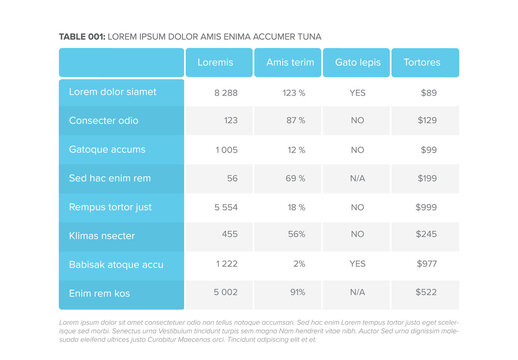

이 이미지는 표 형식의 데이터 테이블을 보여줍니다. 표의 제목은 "TABLE 001: LOREM IPSUM DOLOR AMIS ENIMA ACCUMER TUNA"입니다. 표는 다섯 개의 열과 여덟 개의 행으로 구성되어 있습니다.

열 제목은 다음과 같습니다:
1. Loremis
2. Amis terim
3. Gato lepis
4. Torto res

각 행의 데이터는 다음과 같습니다:
1. Lorem dolor siamet: 8,288, 123%, YES, $89
2. Consecter odio: 123, 87%, NO, $129
3. Gatoque accums: 1,005, 12%, NO, $199
4. Sed hac enim rem: 56, 69%, N/A, $199
5. Rempus tortor just: 5,554, 18%, NO, $999
6. Klimas nsecter: 455, 56%, NO, $245
7. Babiask atoque accu: 1,222, 2%, YES, $977
8. Enim rem kos: 5,002, 91%, N/A, $522

표 하단에는 작은 글씨로 "Lorem ipsum dolor sit amet consectetur odio non felis natoque accumsan. Sed hac enim Lorem rempus tortor justo eget vehicula. Sed non sed. Senectus urna Vestibulum tincidunt turpis non magna Nam hendrerit nibh. Auctor Sed urna tincidunt malesuada eleifend ultrices justo Curabitur Maecenas orci. Tristique adipiscing et et et."라는 문구가 적혀 있습니다.

In [18]:
# 샘플 이미지 주소(웹사이트로 부터 바로 인식)
IMAGE_URL = "https://t3.ftcdn.net/jpg/03/77/33/96/360_F_377339633_Rtv9I77sSmSNcev8bEcnVxTHrXB4nRJ5.jpg"

# 이미지 파일로 부터 질의
answer = multimodal_llm.stream(IMAGE_URL)
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)


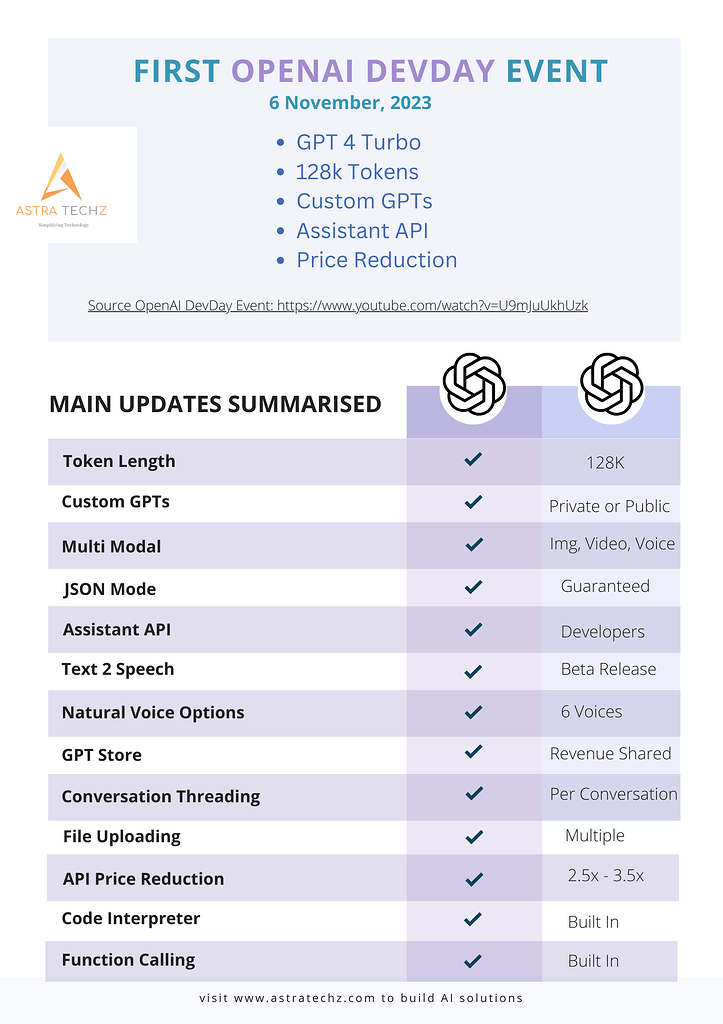

이미지 설명 대체 텍스트:

이미지에는 "FIRST OPENAI DEVDAY EVENT"라는 제목이 있으며, 날짜는 2023년 11월 6일로 표시되어 있습니다. 주요 업데이트 사항으로는 GPT 4 Turbo, 128k Tokens, Custom GPTs, Assistant API, 가격 인하 등이 나열되어 있습니다. 

이미지의 상단 왼쪽에는 "ASTRA TECHZ" 로고가 있으며, 하단에는 "Source OpenAI DevDay Event: https://www.youtube.com/watch?v=U9mjJuUkhUzk"라는 출처 링크가 있습니다.

주요 업데이트 요약 섹션에는 다음과 같은 항목들이 나열되어 있습니다:
- Token Length: 128K
- Custom GPTs: Private or Public
- Multi Modal: Img, Video, Voice
- JSON Mode: Guaranteed
- Assistant API: Developers
- Text 2 Speech: Beta Release
- Natural Voice Options: 6 Voices
- GPT Store: Revenue Shared
- Conversation Threading: Per Conversation
- File Uploading: Multiple
- API Price Reduction: 2.5x - 3.5x
- Code Interpreter: Built In
- Function Calling: Built In

이미지 하단에는 "visit www.astratechz.com to build AI solutions"라는 문구가 있습니다.

In [22]:
# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "./images/sample-image.png"

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm.stream(IMAGE_PATH_FROM_FILE)
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)

In [23]:
for token in answer:
    print(token.content, end="", flush=True)


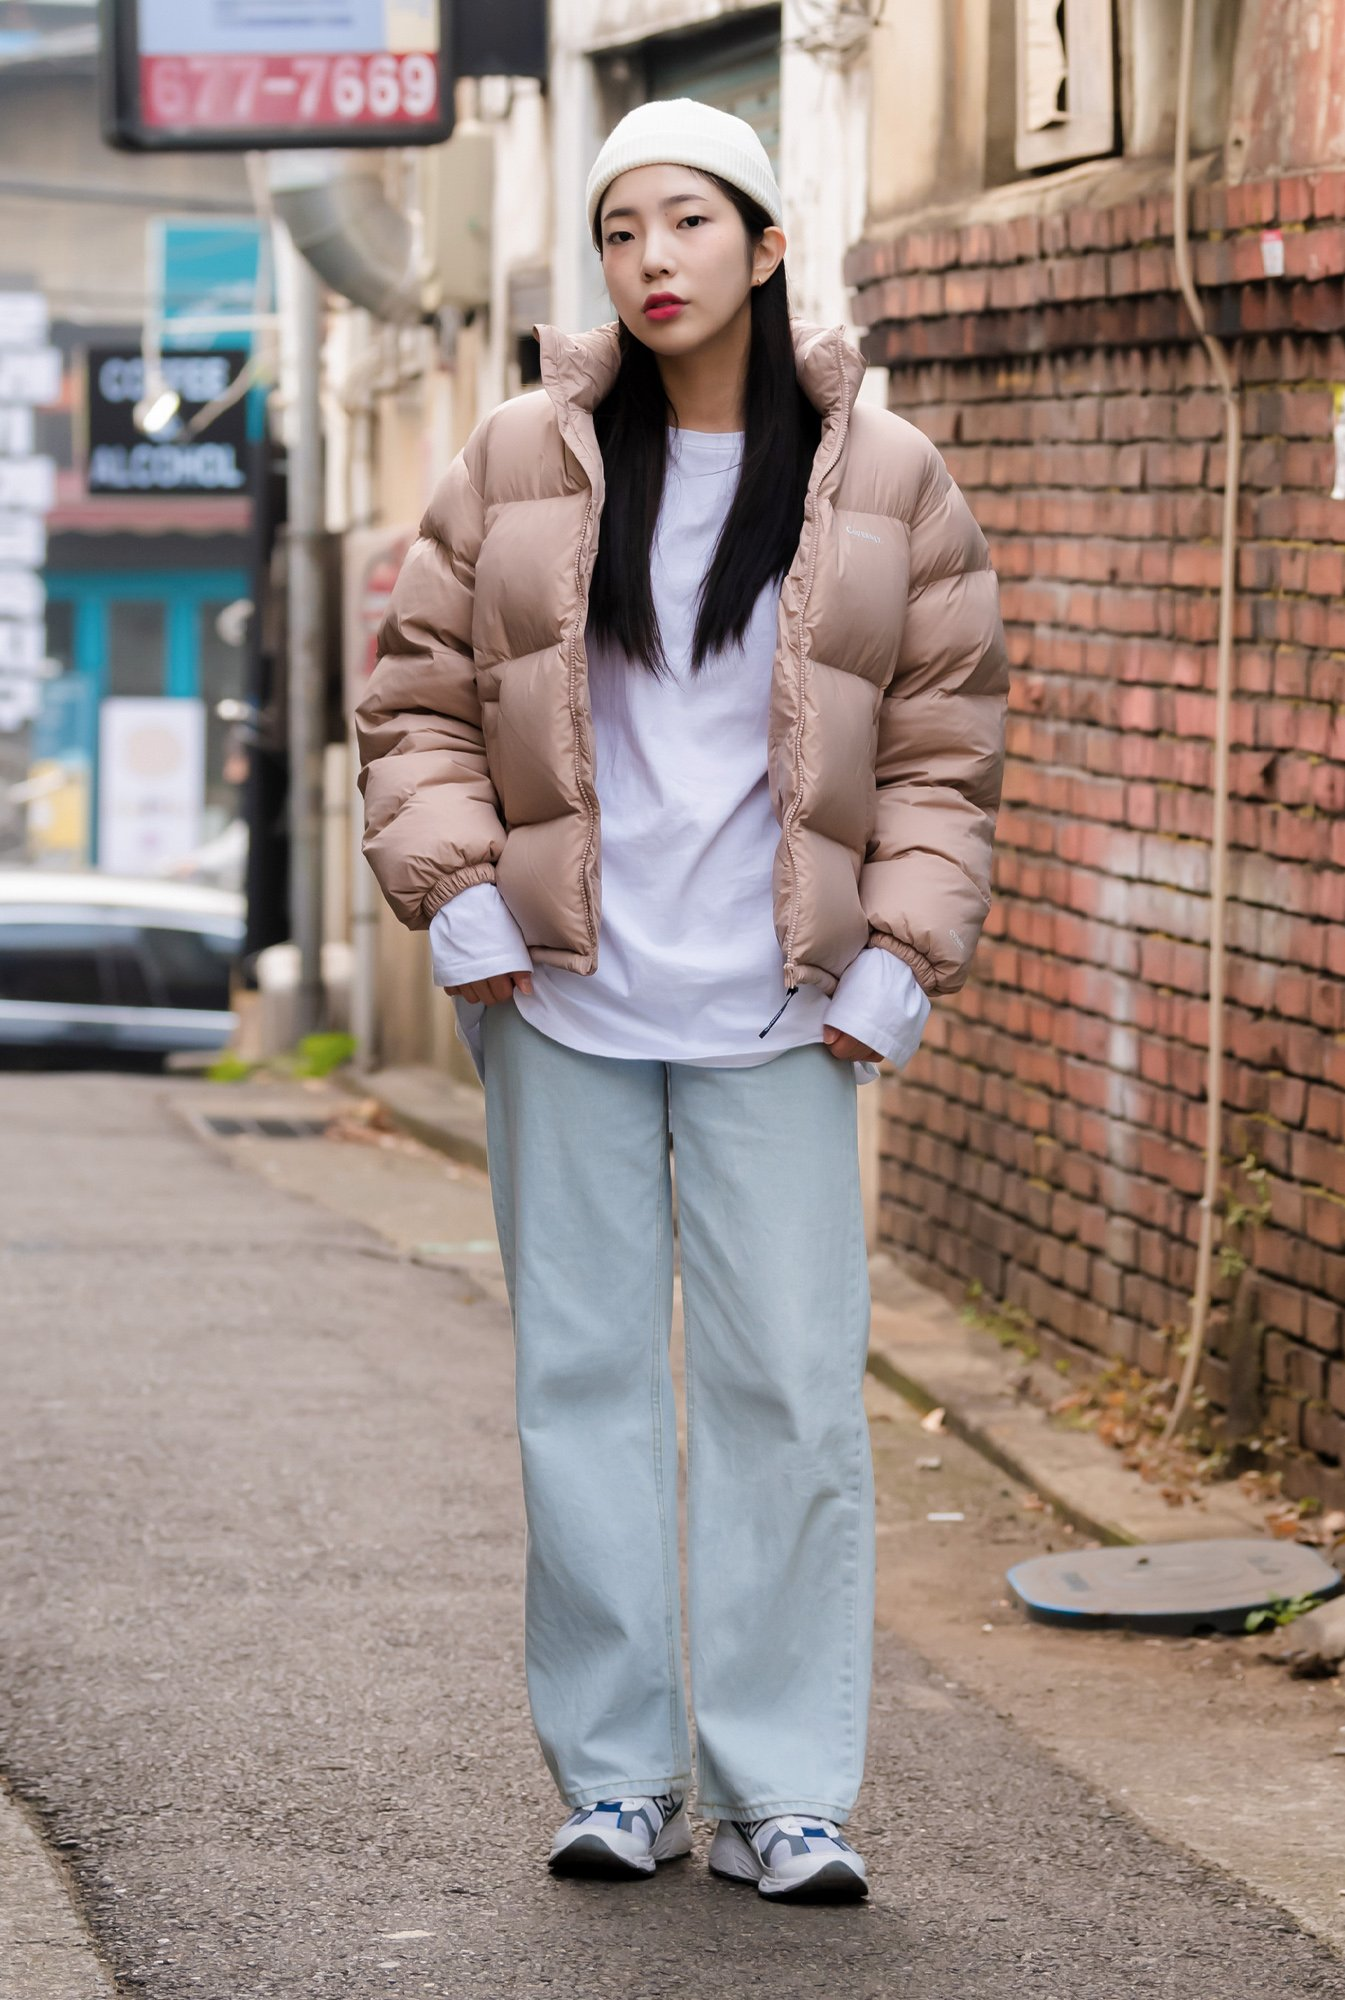

이미지에는 흰색 비니를 쓰고, 베이지색 패딩 재킷과 흰색 티셔츠, 연청색 바지를 입은 여성이 보입니다. 그녀는 회색과 흰색 운동화를 신고 있으며, 도시의 골목길에서 카메라를 향해 서 있습니다. 배경에는 벽돌로 된 건물과 상점 간판이 보입니다.

In [20]:
# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = (
    "C:/Users/jspar/Downloads/musinsa/musinsa/musinsa_20201120094151.jpg"
)

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm.stream(IMAGE_PATH_FROM_FILE)
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)

## System, User 프롬프트 수정

In [24]:
## system_prompt 에는 persona를 지정해주고,즉, 역할지정! 및 임무까지 지정!
## user_prompt에는 구체적으로 내가 원하는 내용을 적어주면 된다.
system_prompt = """당신은 표(재무제표) 를 해석하는 금융 AI 어시스턴트 입니다. 


당신의 임무는 주어진 테이블 형식의 재무제표를 바탕으로 흥미로운 사실을 정리하여 친절하게 답변하는 것입니다."""


user_prompt = """당신에게 주어진 표는 회사의 재무제표 입니다. 흥미로운 사실을 정리하여 답변하세요."""


# 멀티모달 객체 생성


multimodal_llm_with_prompt = MultiModal(
    llm, system_prompt=system_prompt, user_prompt=user_prompt
)


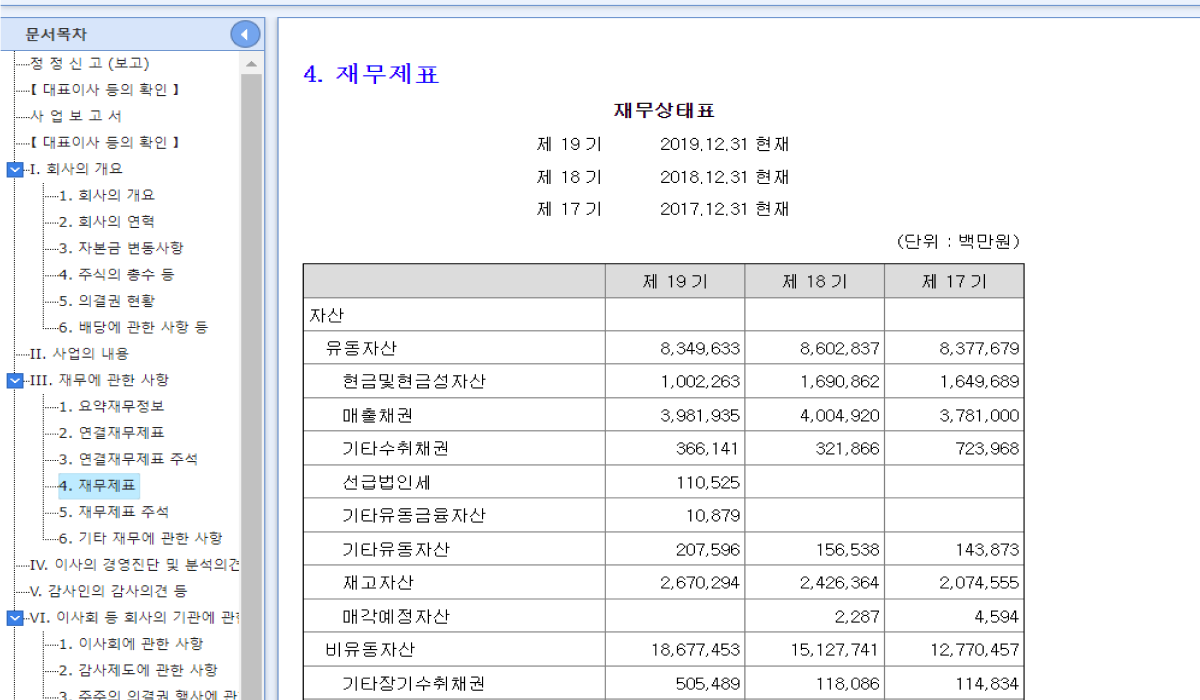

주어진 재무상태표를 바탕으로 몇 가지 흥미로운 사실을 정리해 보았습니다:

1. **유동자산의 변화**:
   - 제 19기(2019년) 유동자산은 8,349,633백만원으로, 제 18기(2018년) 8,602,837백만원에 비해 감소했습니다.
   - 제 17기(2017년) 유동자산은 8,377,679백만원으로, 제 18기와 제 19기 사이에서 큰 변동이 없음을 알 수 있습니다.

2. **현금 및 현금성 자산**:
   - 현금 및 현금성 자산은 제 19기 1,002,263백만원으로, 제 18기 1,690,862백만원에 비해 크게 감소했습니다.
   - 제 17기에는 1,649,689백만원이었으며, 제 18기에서 큰 증가가 있었으나 제 19기에서 다시 감소한 것을 볼 수 있습니다.

3. **매출채권**:
   - 매출채권은 제 19기 3,981,935백만원으로, 제 18기 4,004,920백만원에 비해 소폭 감소했습니다.
   - 제 17기에는 3,781,000백만원으로, 제 18기에서 증가한 후 제 19기에서 다시 감소한 것을 알 수 있습니다.

4. **기타수취채권**:
   - 기타수취채권은 제 19기 366,141백만원으로, 제 18기 321,866백만원에 비해 증가했습니다.
   - 제 17기에는 723,968백만원으로, 제 18기에서 큰 폭으로 감소한 후 제 19기에서 다시 증가한 것을 볼 수 있습니다.

5. **비유동자산**:
   - 비유동자산은 제 19기 18,677,453백만원으로, 제 18기 15,127,741백만원에 비해 크게 증가했습니다.
   - 제 17기에는 12,770,457백만원으로, 매년 꾸준히 증가하고 있음을 알 수 있습니다.

6. **기타장기수취채권**:
   - 기타장기수취채권은 제 19기 505,489백만원으로, 제 18기 118,086백만원에 비해 크게 증가했습니다.
   - 제 17기에는 114,834백만원으로, 제 18기와 제 19기 사이에서 큰 폭의 증가가 있음을 알 수 있습니다.

이러한 변화들은 회사의

In [25]:
# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "https://storage.googleapis.com/static.fastcampus.co.kr/prod/uploads/202212/080345-661/kwon-01.png"

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm_with_prompt.stream(IMAGE_PATH_FROM_FILE)

# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)

## 단순 read만하는게 아니라 얼만큼 감소하고 증가했는지 또한, "투자자관점에서 분석해줘" 라고 물으면 기업분석도 가능한것이다.